In [1]:
import pandas as pd
import numpy as np
td_2011 = pd.read_csv('/Users/cd/Documents/Code Academy Berlin/Project 3/2011+trip+data/2011-capitalbikeshare-tripdata.csv')
td_2011_copy = td_2011.copy()  

In [2]:
td_2011.head()


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [3]:
#hunting nans
nan_indices = td_2011.isna()
print(nan_indices.any()) 

Duration                False
Start date              False
End date                False
Start station number    False
Start station           False
End station number      False
End station             False
Bike number             False
Member type             False
dtype: bool


In [4]:
# Count NaN values of whole DataFrame. nothing is NaN
nan_count=td_2011.isna().sum().sum()
print(nan_count)

0


In [5]:
#hunting duplicates, none found
duplicateRows = td_2011[td_2011.duplicated()]
print(duplicateRows) 

Empty DataFrame
Columns: [Duration, Start date, End date, Start station number, Start station, End station number, End station, Bike number, Member type]
Index: []


In [6]:
#The attribute dteday would require type conversion from object (or string type) to timestamp. 
#That is, 'dteday' should be a 'datetime' object.
td_2011['Start date'] = pd.to_datetime(td_2011['Start date'])
td_2011['End date'] = pd.to_datetime(td_2011['End date'])
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Duration              1226767 non-null  int64         
 1   Start date            1226767 non-null  datetime64[ns]
 2   End date              1226767 non-null  datetime64[ns]
 3   Start station number  1226767 non-null  int64         
 4   Start station         1226767 non-null  object        
 5   End station number    1226767 non-null  int64         
 6   End station           1226767 non-null  object        
 7   Bike number           1226767 non-null  object        
 8   Member type           1226767 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 84.2+ MB


In [7]:
td_2011['Duration_sec'] = td_2011['Duration']
td_2011.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233


In [8]:
td_2011[["Start station number", "End station number"]] = td_2011[["Start station number", "End station number"]].astype("category")

In [9]:
print(td_2011[["Start station number", "End station number", 'Duration', 'Bike number']].dtypes)

Start station number    category
End station number      category
Duration                   int64
Bike number               object
dtype: object


In [10]:
td_2011[["Bike number"]] = td_2011[["Bike number"]].astype("str")
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Duration              1226767 non-null  int64         
 1   Start date            1226767 non-null  datetime64[ns]
 2   End date              1226767 non-null  datetime64[ns]
 3   Start station number  1226767 non-null  category      
 4   Start station         1226767 non-null  object        
 5   End station number    1226767 non-null  category      
 6   End station           1226767 non-null  object        
 7   Bike number           1226767 non-null  object        
 8   Member type           1226767 non-null  object        
 9   Duration_sec          1226767 non-null  int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(4)
memory usage: 79.6+ MB


In [11]:
def add_underscores(td_2011):
    td_2011.columns = td_2011.columns.str.replace(' ', '_')
    return td_2011
td_2011 = add_underscores(td_2011)


In [12]:
td_2011.columns = td_2011.columns.str.lower()
td_2011

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233
...,...,...,...,...,...,...,...,...,...,...
1226762,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member,300
1226763,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member,387
1226764,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member,261
1226765,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member,2060


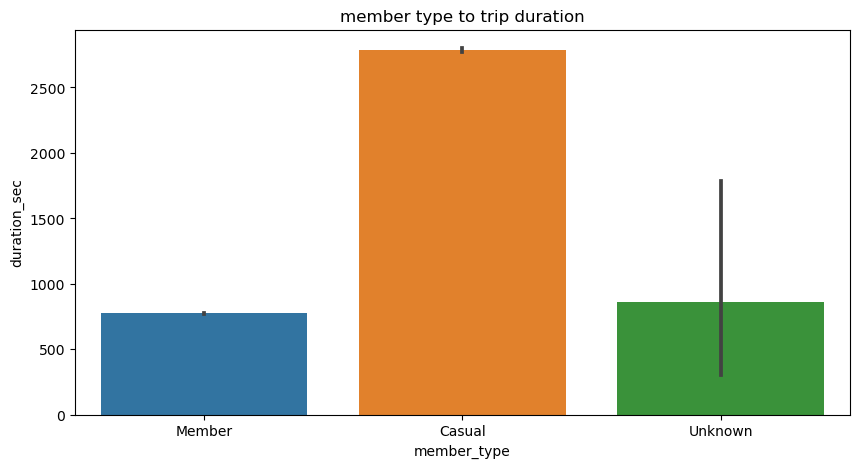

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=td_2011, x='member_type', y='duration_sec')
ax.set(title="member type to trip duration")
plt.show()

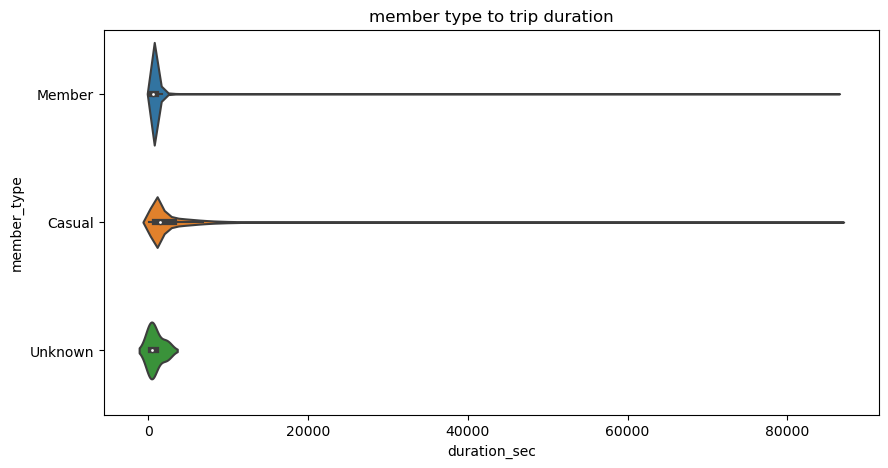

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))
bike_no = td_2011[td_2011['bike_number']=='W00675']
sns.violinplot(data=td_2011, x='duration_sec', y='member_type')
ax.set(title="member type to trip duration")
plt.show()

In [15]:
bike_no = td_2011[td_2011['bike_number']=='W00675']
bike_no

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
45,451,2011-01-01 01:46:59,2011-01-01 01:54:31,31101,14th & V St NW,31207,Georgia Ave and Fairmont St NW,W00675,Member,451
183,524,2011-01-01 11:32:35,2011-01-01 11:41:20,31207,Georgia Ave and Fairmont St NW,31104,Adams Mill & Columbia Rd NW,W00675,Member,524
368,634,2011-01-01 13:41:17,2011-01-01 13:51:51,31104,Adams Mill & Columbia Rd NW,31207,Georgia Ave and Fairmont St NW,W00675,Member,634
1029,387,2011-01-02 09:40:24,2011-01-02 09:46:52,31207,Georgia Ave and Fairmont St NW,31101,14th & V St NW,W00675,Member,387
...,...,...,...,...,...,...,...,...,...,...
1212742,641,2011-12-24 11:25:28,2011-12-24 11:36:10,31230,Metro Center / 12th & G St NW,31203,14th & Rhode Island Ave NW,W00675,Member,641
1214377,2857,2011-12-26 10:22:00,2011-12-26 11:09:38,31203,14th & Rhode Island Ave NW,31620,5th & F St NW,W00675,Casual,2857
1215511,572,2011-12-26 23:54:48,2011-12-27 00:04:20,31620,5th & F St NW,31108,4th & M St SW,W00675,Member,572
1215636,897,2011-12-27 07:43:22,2011-12-27 07:58:19,31108,4th & M St SW,31222,New York Ave & 15th St NW,W00675,Member,897


In [16]:
td_2011['start_station_number'].value_counts()

31200    49093
31201    32884
31623    32058
31104    29964
31214    28160
         ...  
31806        4
31704        1
31708        1
31052        1
31266        1
Name: start_station_number, Length: 144, dtype: int64

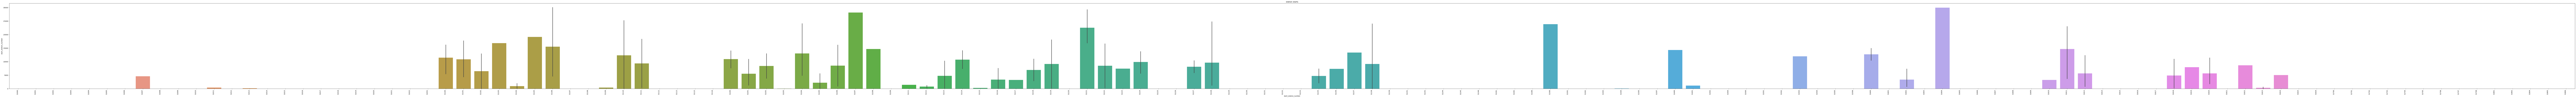

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(300,10))
#ssn_valc = td_2011['start_station_number'].value_counts()
#plot_order = td_2011.groupby('start_station_number')[ssn_valc].sum().sort_values(ascending=False).index.values
sns.barplot(data=td_2011, x='start_station_number', y=td_2011['start_station_number'].value_counts())
ax.set(title="station starts")
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
plt.show()



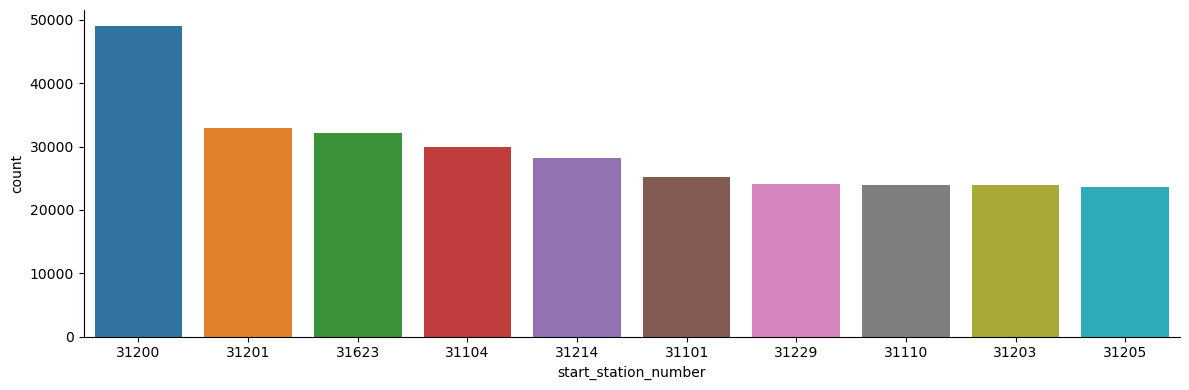

In [18]:
#top 10 starting stations

sns.catplot(data=td_2011, kind='count', x='start_station_number', height=4, aspect=3,  order=pd.value_counts(td_2011['start_station_number']).iloc[:10].index)
#order= td_2011['start_station_number'].value_counts().index,

focus on rebalancing 
#costs start here:
#https://www.sciencedirect.com/science/article/abs/pii/S0377221718302030


## notice 31229 and 31228. 31229 is a top 10 starting station, but not ending. 31228 is a top 10 ending station, but not starting. 


'''Clearly, the repositioning of bikes from stations too full to stations too empty is a huge operational overhead. 
In fact, for Vélib system in Paris, the average cost of a single repositioning for a single bike is $3 (DeMaio, 2009). 
According to a report by New York City Department of City Planning (2009) based on different case studies, 
the total capital cost for a bike sharing system varies from $3000/bike to $4400/bike in different cities. 
then averaged across programs, the yearly operating cost for a bike share program is around $1600/bike.'''

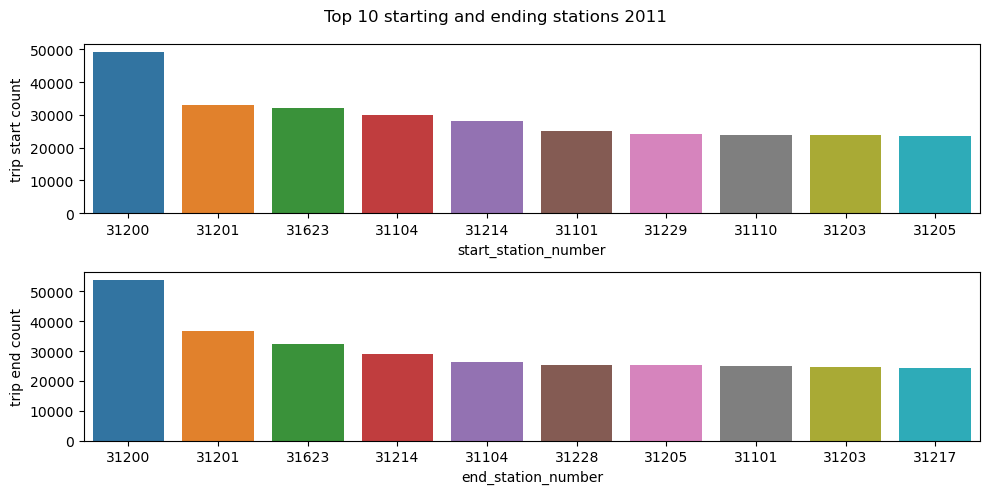

In [19]:
#top 10 starting and ending stations 2011

fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.countplot(data=td_2011,  x='start_station_number', order=pd.value_counts(td_2011['start_station_number']).iloc[:10].index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=td_2011,  x='end_station_number', order=pd.value_counts(td_2011['end_station_number']).iloc[:10].index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("Top 10 starting and ending stations 2011")
plt.tight_layout()
plt.show()


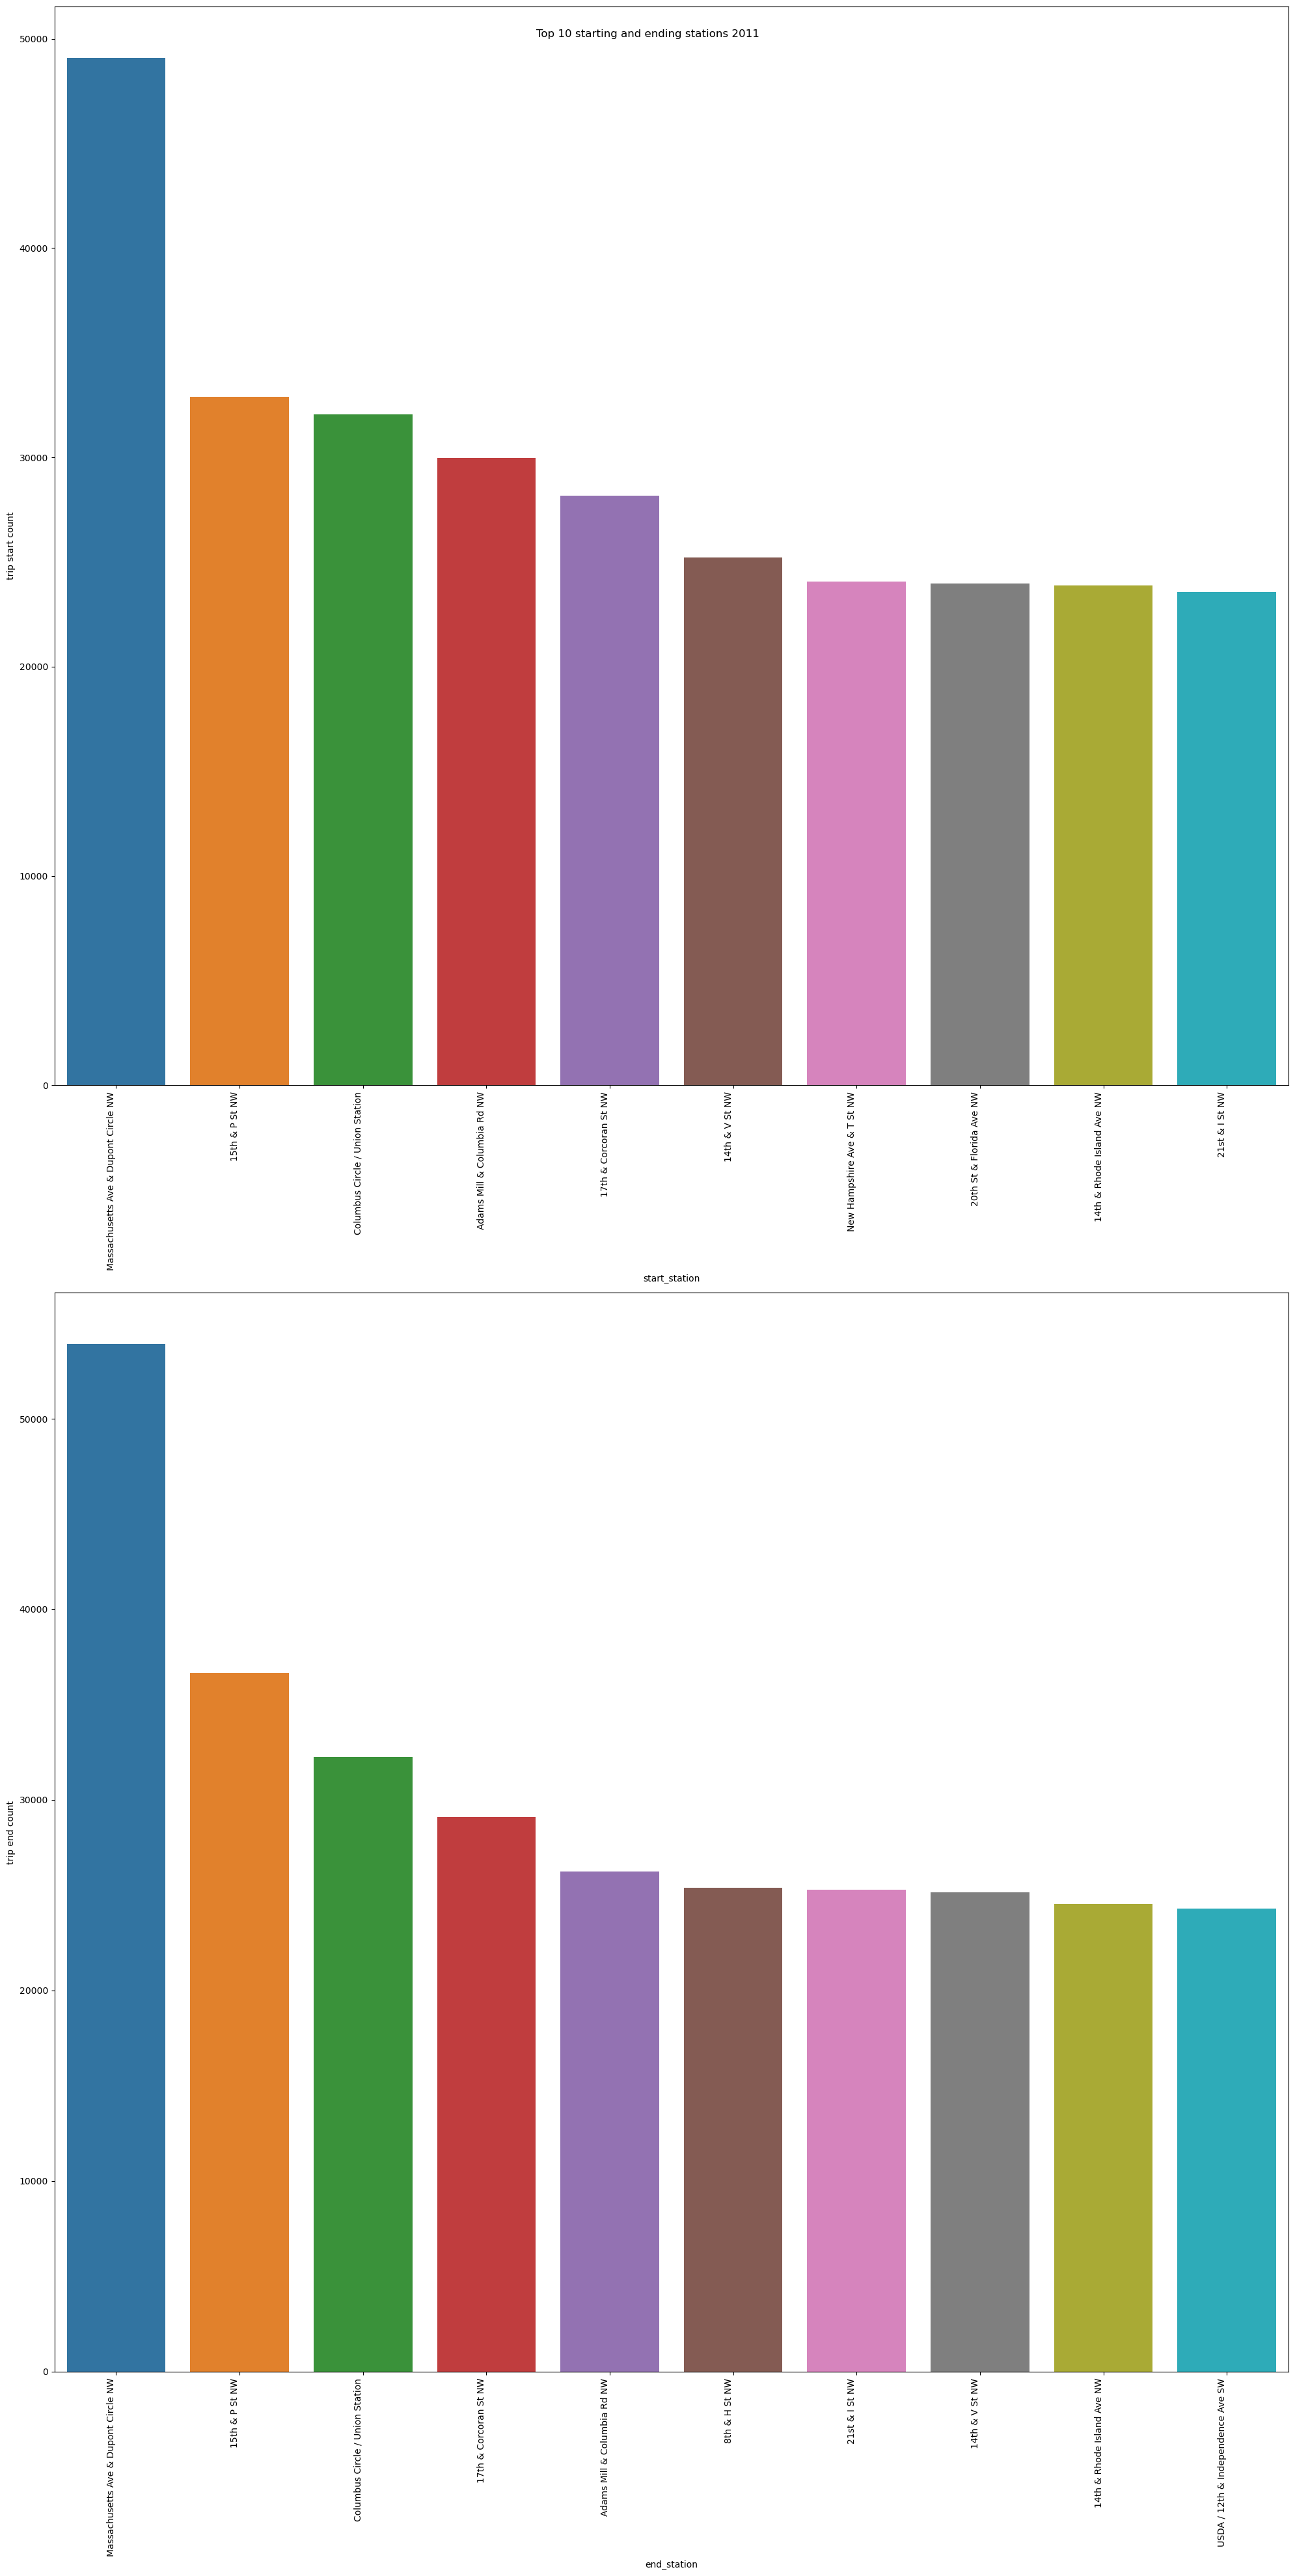

In [20]:
##top 10 in 2011 by name

fig, ax = plt.subplots(2,1, figsize=(20,40))

sns.countplot(data=td_2011,  x='start_station', order=pd.value_counts(td_2011['start_station']).iloc[:10].index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=td_2011,  x='end_station', order=pd.value_counts(td_2011['end_station']).iloc[:10].index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("Top 10 starting and ending stations 2011")
ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.tight_layout()
plt.show()

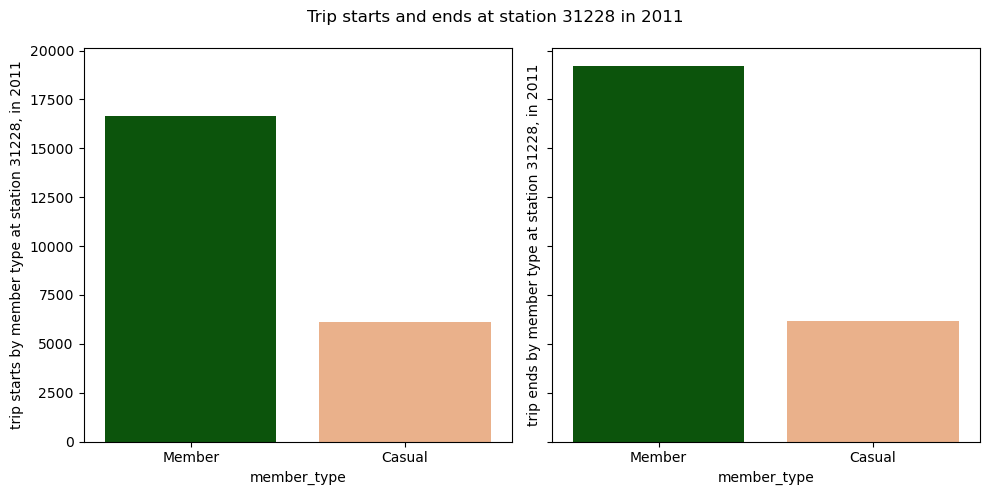

In [21]:
#station 31228 in 2011
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,5))

sns.countplot(data=td_2011[td_2011['start_station_number'] == 31228], x='member_type', ax=ax[0], palette=['#006000',"#FAAE7B"]).set(ylabel='trip starts by member type at station 31228, in 2011')

sns.countplot(data=td_2011[td_2011['end_station_number'] == 31228], x='member_type', ax=ax[1], palette=['#006000',"#FAAE7B"]).set(ylabel='trip ends by member type at station 31228, in 2011')
fig.suptitle("Trip starts and ends at station 31228 in 2011")
plt.tight_layout()

plt.show()


now plot the top 10 stations by user type
casuals use which 10 stations the most?
members use wich 10 stations the most?
top10 where usertype == casual or member

In [22]:
#importing the 2012 dataset

import os

# Get CSV files list from a folder
os.chdir('/Users/cd/Documents/Code Academy Berlin/Project 3/2012+trip+data/2012-capitalbikeshare-tripdata')
csv_files = [f for f in os.listdir() if f.endswith('.csv')]
dfs = []

for csv in csv_files:
    df = pd.read_csv(csv)
    dfs.append(df)

final_df = pd.concat(dfs, ignore_index=True)




In [23]:
td_2012 = final_df
td_2012_copy = td_2012.copy()

In [24]:
td_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028911 entries, 0 to 2028910
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Duration              int64 
 1   Start date            object
 2   End date              object
 3   Start station number  int64 
 4   Start station         object
 5   End station number    int64 
 6   End station           object
 7   Bike number           object
 8   Member type           object
dtypes: int64(3), object(6)
memory usage: 139.3+ MB


In [25]:
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   duration              1226767 non-null  int64         
 1   start_date            1226767 non-null  datetime64[ns]
 2   end_date              1226767 non-null  datetime64[ns]
 3   start_station_number  1226767 non-null  category      
 4   start_station         1226767 non-null  object        
 5   end_station_number    1226767 non-null  category      
 6   end_station           1226767 non-null  object        
 7   bike_number           1226767 non-null  object        
 8   member_type           1226767 non-null  object        
 9   duration_sec          1226767 non-null  int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(4)
memory usage: 79.6+ MB


In [26]:
#hunting nans
nan_indices = td_2012.isna()
print(nan_indices.any()) 

Duration                False
Start date              False
End date                False
Start station number    False
Start station           False
End station number      False
End station             False
Bike number             False
Member type             False
dtype: bool


In [27]:
# Count NaN values of whole DataFrame. nothing is NaN
nan_count=td_2012.isna().sum().sum()
print(nan_count)

0


In [28]:
#hunting duplicates, none found
duplicateRows = td_2012[td_2012.duplicated()]
print(duplicateRows) 

Empty DataFrame
Columns: [Duration, Start date, End date, Start station number, Start station, End station number, End station, Bike number, Member type]
Index: []


In [29]:
#The attribute dteday would require type conversion from object (or string type) to timestamp. 
#That is, 'dteday' should be a 'datetime' object.
td_2012['Start date'] = pd.to_datetime(td_2012['Start date'])
td_2012['End date'] = pd.to_datetime(td_2012['End date'])
td_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028911 entries, 0 to 2028910
Data columns (total 9 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   End date              datetime64[ns]
 3   Start station number  int64         
 4   Start station         object        
 5   End station number    int64         
 6   End station           object        
 7   Bike number           object        
 8   Member type           object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 139.3+ MB


In [30]:
td_2012['Duration_sec'] = td_2012['Duration']
td_2012[["Start station number", "End station number"]] = td_2012[["Start station number", "End station number"]].astype("category")
td_2012[["Bike number"]] = td_2012[["Bike number"]].astype("str")
def add_underscores(td_2012):
    td_2012.columns = td_2012.columns.str.replace(' ', '_')
    return td_2012
td_2012 = add_underscores(td_2012)
td_2012.columns = td_2012.columns.str.lower()
td_2012.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028911 entries, 0 to 2028910
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   duration              int64         
 1   start_date            datetime64[ns]
 2   end_date              datetime64[ns]
 3   start_station_number  category      
 4   start_station         object        
 5   end_station_number    category      
 6   end_station           object        
 7   bike_number           object        
 8   member_type           object        
 9   duration_sec          int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(4)
memory usage: 131.6+ MB


In [31]:
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   duration              1226767 non-null  int64         
 1   start_date            1226767 non-null  datetime64[ns]
 2   end_date              1226767 non-null  datetime64[ns]
 3   start_station_number  1226767 non-null  category      
 4   start_station         1226767 non-null  object        
 5   end_station_number    1226767 non-null  category      
 6   end_station           1226767 non-null  object        
 7   bike_number           1226767 non-null  object        
 8   member_type           1226767 non-null  object        
 9   duration_sec          1226767 non-null  int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(4)
memory usage: 79.6+ MB


In [32]:
combi_td1112 = pd.concat([td_2011, td_2012], ignore_index=True)
combi_td1112

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233
...,...,...,...,...,...,...,...,...,...,...
3255673,166,2012-06-30 23:58:05,2012-07-01 00:00:52,31212,21st & M St NW,31246,M St & Pennsylvania Ave NW,W20089,Member,166
3255674,1374,2012-06-30 23:58:23,2012-07-01 00:21:18,31202,14th & R St NW,31622,13th & D St NE,W01244,Casual,1374
3255675,469,2012-06-30 23:58:30,2012-07-01 00:06:19,31101,14th & V St NW,31212,21st & M St NW,W00145,Member,469
3255676,977,2012-06-30 23:59:03,2012-07-01 00:15:21,31611,13th & H St NE,31102,11th & Kenyon St NW,W01181,Member,977


In [33]:
td_2012.tail()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
2028906,166,2012-06-30 23:58:05,2012-07-01 00:00:52,31212,21st & M St NW,31246,M St & Pennsylvania Ave NW,W20089,Member,166
2028907,1374,2012-06-30 23:58:23,2012-07-01 00:21:18,31202,14th & R St NW,31622,13th & D St NE,W01244,Casual,1374
2028908,469,2012-06-30 23:58:30,2012-07-01 00:06:19,31101,14th & V St NW,31212,21st & M St NW,W00145,Member,469
2028909,977,2012-06-30 23:59:03,2012-07-01 00:15:21,31611,13th & H St NE,31102,11th & Kenyon St NW,W01181,Member,977
2028910,650,2012-06-30 23:59:27,2012-07-01 00:10:18,31503,Florida Ave & R St NW,31214,17th & Corcoran St NW,W01188,Member,650


In [34]:
combi_td1112.sort_values(by='start_date', inplace = True)
combi_td1112

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233
...,...,...,...,...,...,...,...,...,...,...
2688841,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual,8630
2688842,418,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member,418
2688843,384,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member,384
2688844,448,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member,448


now plot the top 10 stations by user type
casuals use which 10 stations the most?
members use wich 10 stations the most?
top10 where usertype == casual or member

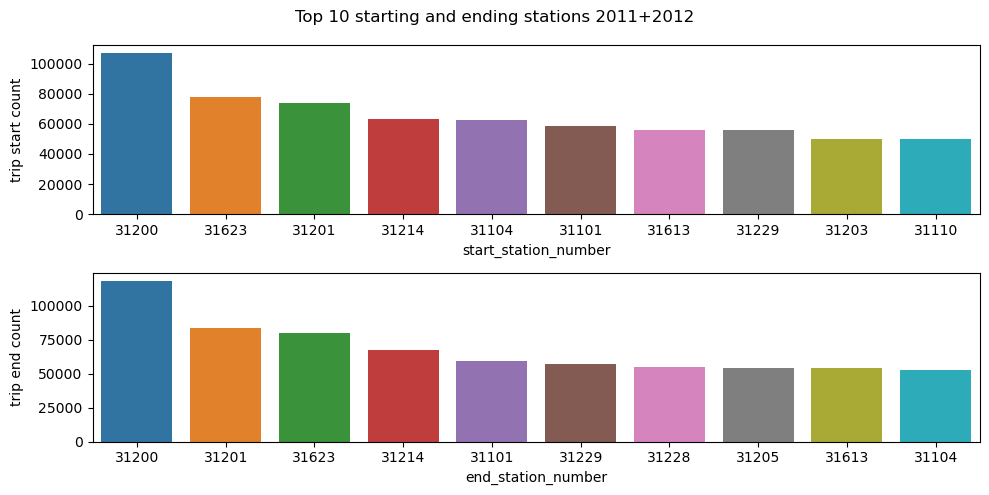

In [35]:
#top 10 starting and ending stations 2011-2012: focus on rebalancing 
#costs start here:
#https://www.sciencedirect.com/science/article/abs/pii/S0377221718302030


##

# Clearly, the repositioning of bikes from stations too full to stations too empty is a huge operational overhead. 
#In fact, for Vélib system in Paris, the average cost of a single repositioning for a single bike is $3 (DeMaio, 2009). 
#According to a report by New York City Department of City Planning (2009) based on different case studies, 
#the total capital cost for a bike sharing system varies from $3000/bike to $4400/bike in different cities. 
#When averaged across programs, the yearly operating cost for a bike share program is around $1600/bike.

fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.countplot(data=combi_td1112,  x='start_station_number', order=pd.value_counts(combi_td1112['start_station_number']).iloc[:10].index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=combi_td1112,  x='end_station_number', order=pd.value_counts(combi_td1112['end_station_number']).iloc[:10].index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("Top 10 starting and ending stations 2011+2012")
plt.tight_layout()
plt.show()

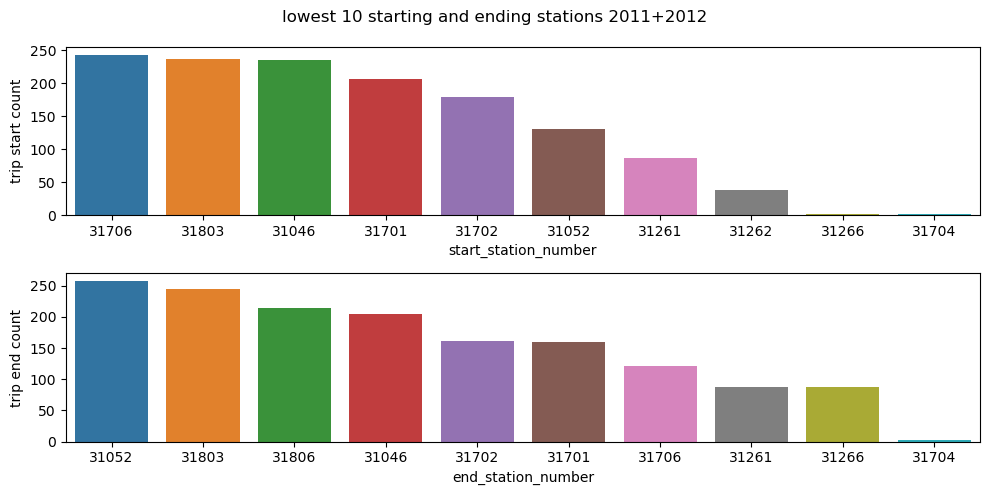

In [36]:
#lowest 10 stations

fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.countplot(data=combi_td1112,  x='start_station_number', order=pd.value_counts(combi_td1112['start_station_number']).tail(10).index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=combi_td1112,  x='end_station_number', order=pd.value_counts(combi_td1112['end_station_number']).tail(10).index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("lowest 10 starting and ending stations 2011+2012")
plt.tight_layout()
plt.show()

In [37]:
##hunting potentially removed stations from the lowest values above
#31266, 31704, 31261, all disappear from records during 2011

df1= combi_td1112[combi_td1112['end_station_number'] == 31702]
df1

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
10643,1851,2011-01-09 16:01:59,2011-01-09 16:32:50,31700,Good Hope & Naylor Rd SE,31702,Randle Circle & Minnesota Ave SE,W00629,Member,1851
34059,1287,2011-01-29 09:39:44,2011-01-29 10:01:11,31705,Benning Branch Library,31702,Randle Circle & Minnesota Ave SE,W00412,Member,1287
40885,754,2011-02-03 11:41:26,2011-02-03 11:54:01,31705,Benning Branch Library,31702,Randle Circle & Minnesota Ave SE,W00558,Member,754
42717,713,2011-02-04 14:51:48,2011-02-04 15:03:42,31802,Good Hope Rd & MLK Ave SE,31702,Randle Circle & Minnesota Ave SE,W00568,Member,713
43937,833,2011-02-05 14:42:01,2011-02-05 14:55:54,31705,Benning Branch Library,31702,Randle Circle & Minnesota Ave SE,W01067,Member,833
...,...,...,...,...,...,...,...,...,...,...
2405994,2283,2012-10-28 12:17:09,2012-10-28 12:55:13,31625,3rd & G St SE,31702,Randle Circle & Minnesota Ave SE,W01255,Member,2283
2552336,1441,2012-11-28 13:29:56,2012-11-28 13:53:58,31209,1st & N St SE,31702,Randle Circle & Minnesota Ave SE,W01339,Member,1441
2645421,4248,2012-12-16 01:11:59,2012-12-16 02:22:48,31402,14th St Heights / 14th & Crittenden St NW,31702,Randle Circle & Minnesota Ave SE,W01144,Casual,4248
2664416,468,2012-12-20 05:18:40,2012-12-20 05:26:29,31705,Benning Branch Library,31702,Randle Circle & Minnesota Ave SE,W01371,Member,468


#31266, 31704, 31261, all disappear from records during 2011

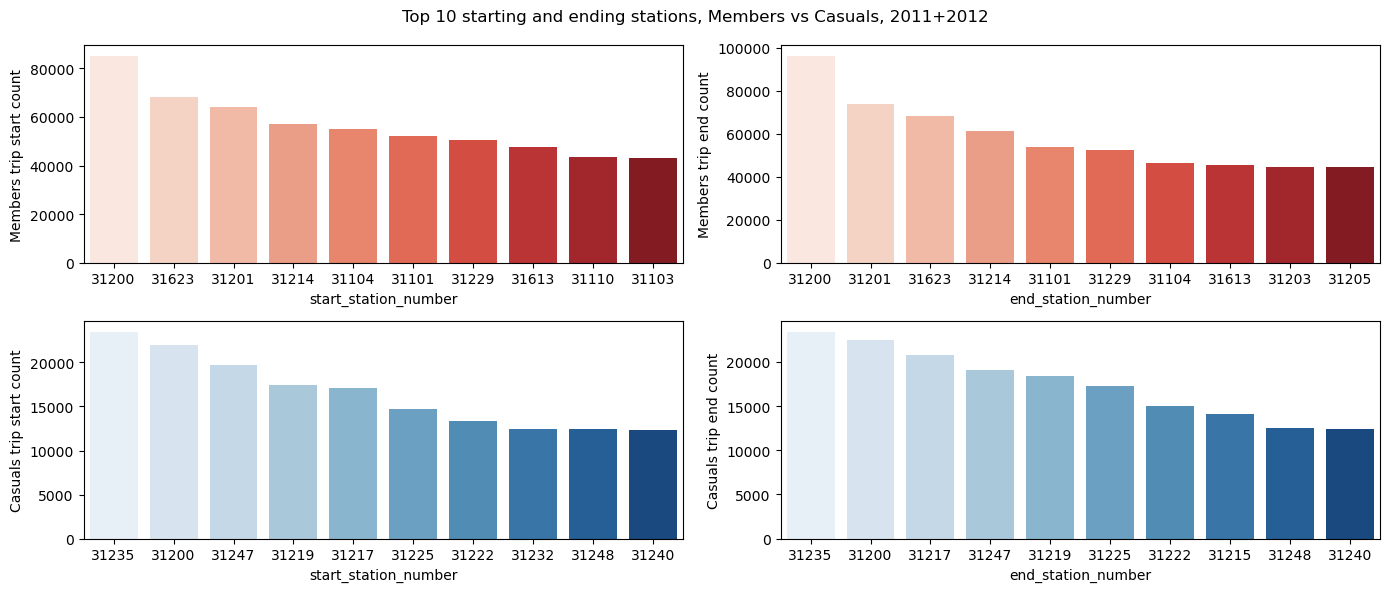

In [38]:
#top 5 stations for members vs casuals, starts and ends
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2,2, figsize=(14,6))
casual_df=combi_td1112[combi_td1112['member_type'] == 'Casual']
member_df=combi_td1112[combi_td1112['member_type'] == 'Member']


sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Member'],  x='start_station_number', order=pd.value_counts(member_df['start_station_number']).iloc[:10].index, ax=ax[0,0], palette='Reds', dodge=True).set(ylabel='Members trip start count')
sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Member'],  x='end_station_number', order=pd.value_counts(member_df['end_station_number']).iloc[:10].index, ax=ax[0,1], palette='Reds', dodge=True).set(ylabel='Members trip end count')

sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Casual'], x='start_station_number', order=pd.value_counts(casual_df['start_station_number']).iloc[:10].index, ax=ax[1,0], palette='Blues').set(ylabel='Casuals trip start count')
sns.countplot(data=combi_td1112[combi_td1112['member_type'] == 'Casual'], x='end_station_number', order=pd.value_counts(casual_df['end_station_number']).iloc[:10].index, ax=ax[1,1], palette='Blues').set(ylabel='Casuals trip end count')
fig.suptitle("Top 10 starting and ending stations, Members vs Casuals, 2011+2012")
plt.tight_layout()
plt.show()

#https://stackoverflow.com/questions/57601156/change-axis-along-which-seaborn-applies-color-palette ^^^


In [39]:
#top 7 member start stations
pd.value_counts(member_df['start_station_number']).iloc[:7]


31200    85223
31623    68023
31201    64285
31214    57301
31104    55241
31101    52065
31229    50473
Name: start_station_number, dtype: int64

In [40]:
#bottom 7 all start stations
pd.value_counts(combi_td1112['end_station_number']).tail(7)

31046    205
31702    161
31701    160
31706    121
31261     88
31266     87
31704      3
Name: end_station_number, dtype: int64

In [41]:
#folium use
import folium

m = folium.Map(location=(45.5236, -122.6750))
m

In [42]:
#playing with folium
m = folium.Map([45.35, -121.6972], zoom_start=12)

folium.Marker(
    location=[45.3288, -121.6625],
    tooltip="Click me!",
    popup="Mt. Hood Meadows",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    tooltip="Click me!",
    popup="Timberline Lodge",
    icon=folium.Icon(color="green"),
).add_to(m)

m

In [43]:
#playing with folium
m = folium.Map(location=[-71.38, -73.9], zoom_start=11)

trail_coordinates = [
    (-71.351871840295871, -73.655963711222626),
    (-71.374144382613707, -73.719861619751498),
    (-71.391042575973145, -73.784922248007007),
    (-71.400964450973134, -73.851042243124397),
    (-71.402411391077322, -74.050048183880477),
]

folium.PolyLine(trail_coordinates, tooltip="Coast").add_to(m)

m


In [44]:
#first need to find all unique instances of station number and station name
namenum_df = combi_td1112.filter(['start_station_number','start_station'], axis=1)
print(namenum_df)

         start_station_number  \
0                       31620   
1                       31105   
2                       31400   
3                       31111   
4                       31104   
...                       ...   
2688841                 31619   
2688842                 31101   
2688843                 31101   
2688844                 31613   
2688845                 31223   

                                             start_station  
0                                            5th & F St NW  
1                                     14th & Harvard St NW  
2                           Georgia & New Hampshire Ave NW  
3                                           10th & U St NW  
4                              Adams Mill & Columbia Rd NW  
...                                                    ...  
2688841          Lincoln Park / 13th & East Capitol St NE   
2688842                                     14th & V St NW  
2688843                                     14th & V S

In [45]:
nnum_dc = namenum_df['start_station'].unique()
nnum_dc
nnum_dc = pd.DataFrame({'add': nnum_dc})
nnum_dc['add'] = nnum_dc['add'].astype(str) + ' Washington D.C.'
nnum_dc

,add
0,5th & F St NW Washington D.C.
1,14th & Harvard St NW Washington D.C.
2,Georgia & New Hampshire Ave NW Washington D.C.
3,10th & U St NW Washington D.C.
4,Adams Mill & Columbia Rd NW Washington D.C.
...,...
189,King St & Patrick St Washington D.C.
190,Henry St & Pendleton St Washington D.C.
191,Arlington Blvd & N Queen St Washington D.C.
192,Barton St & 10th St N Washington D.C.


In [46]:
nnum_dc2=nnum_dc.head(5)
nnum_dc2

,add
0,5th & F St NW Washington D.C.
1,14th & Harvard St NW Washington D.C.
2,Georgia & New Hampshire Ave NW Washington D.C.
3,10th & U St NW Washington D.C.
4,Adams Mill & Columbia Rd NW Washington D.C.


In [62]:
stations_df = namenum_df['start_station'].unique()

stations_df = pd.DataFrame({'add': stations_df})

stations_df

,add
0,5th & F St NW
1,14th & Harvard St NW
2,Georgia & New Hampshire Ave NW
3,10th & U St NW
4,Adams Mill & Columbia Rd NW
...,...
189,King St & Patrick St
190,Henry St & Pendleton St
191,Arlington Blvd & N Queen St
192,Barton St & 10th St N


In [47]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import os
import geopy
import json

#After we import all the packages we need, we should open our data and geocode addresses 
# inside it.
#  
#We need Nominatim module from geopy here. 
#After we define our geocoder, we need to loop over every name and get latitude & longitude 
# variables.
#dc lat long: 38.89996347562683, -77.03516744211487

#Importing the required modules
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [49]:
nnum_dc2['add']

0                     5th & F St NW Washington D.C.
1              14th & Harvard St NW Washington D.C.
2    Georgia & New Hampshire Ave NW Washington D.C.
3                    10th & U St NW Washington D.C.
4       Adams Mill & Columbia Rd NW Washington D.C.
Name: add, dtype: object

In [57]:
nnum_dc

,add
0,5th & F St NW Washington D.C.
1,14th & Harvard St NW Washington D.C.
2,Georgia & New Hampshire Ave NW Washington D.C.
3,10th & U St NW Washington D.C.
4,Adams Mill & Columbia Rd NW Washington D.C.
...,...
189,King St & Patrick St Washington D.C.
190,Henry St & Pendleton St Washington D.C.
191,Arlington Blvd & N Queen St Washington D.C.
192,Barton St & 10th St N Washington D.C.


In [58]:
#running a geopy geolocation on the df with DC added to it.
#Importing the required modules
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
 
#Creating a dataframe with address of locations we want to reterive
# locat = ['Coorg, Karnataka' , 'Khajjiar, Himachal Pradesh',
#          'Chail, Himachal Pradesh' , 'Pithoragarh, Uttarakhand','Munnar, Kerala']
# df = pd.DataFrame({'add': locat})

# #Creating an instance of Nominatim Class
geolocator = Nominatim(user_agent="my_request", timeout=None)
 
# #applying the rate limiter wrapper
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
# #Applying the method to pandas DataFrame
nnum_dc['location'] = nnum_dc['add'].apply(geocode)
nnum_dc['Lat'] = nnum_dc['location'].apply(lambda x: x.latitude if x else None)
nnum_dc['Lon'] = nnum_dc['location'].apply(lambda x: x.longitude if x else None)
 
nnum_dc

,add,location,Lat,Lon
0,5th & F St NW Washington D.C.,"(5th and F St NW, F Street Northwest, Penn Qua...",38.897222,-77.019347
1,14th & Harvard St NW Washington D.C.,"(14th and Harvard St NW, Harvard Street Northw...",38.926800,-77.032200
2,Georgia & New Hampshire Ave NW Washington D.C.,"(Georgia & New Hampshire Ave NW, New Hampshire...",38.936693,-77.024178
3,10th & U St NW Washington D.C.,"(10th Street Northwest, 9th St NW-13th St NW, ...",38.918684,-77.025992
4,Adams Mill & Columbia Rd NW Washington D.C.,"(Columbia Road NW And Adams Mill Road NW, Adam...",38.923132,-77.042736
...,...,...,...,...
189,King St & Patrick St Washington D.C.,None,NaN,NaN
190,Henry St & Pendleton St Washington D.C.,None,NaN,NaN
191,Arlington Blvd & N Queen St Washington D.C.,None,NaN,NaN
192,Barton St & 10th St N Washington D.C.,None,NaN,NaN


In [59]:
nnum_dc.to_csv('DC_List_Lat_Long.csv')

In [63]:
#running a geopy geolocation on the df without DC added to it
#Importing the required modules
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
 
#Creating a dataframe with address of locations we want to reterive

# #Creating an instance of Nominatim Class
geolocator = Nominatim(user_agent="my_request", timeout=None)
 
# #applying the rate limiter wrapper
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
# #Applying the method to pandas DataFrame
stations_df['location'] = stations_df['add'].apply(geocode)
stations_df['Lat'] = stations_df['location'].apply(lambda x: x.latitude if x else None)
stations_df['Lon'] = stations_df['location'].apply(lambda x: x.longitude if x else None)
 
stations_df

,add,location,Lat,Lon
0,5th & F St NW,"(5th and F St NW, F Street Northwest, Penn Qua...",38.897222,-77.019347
1,14th & Harvard St NW,"(14th and Harvard St NW, Harvard Street Northw...",38.926800,-77.032200
2,Georgia & New Hampshire Ave NW,"(Georgia & New Hampshire Ave NW, New Hampshire...",38.936693,-77.024178
3,10th & U St NW,"(U Street, Bronx County, The Bronx, City of Ne...",40.805476,-73.856422
4,Adams Mill & Columbia Rd NW,"(Adams Mill and Columbia Rd NW, Columbia Road ...",38.923063,-77.042536
...,...,...,...,...
189,King St & Patrick St,"(King St + Patrick St, King Street, Lyles-Crou...",38.805452,-77.050451
190,Henry St & Pendleton St,"(Henry St and Pendleton St, Pendleton Street, ...",38.811456,-77.050276
191,Arlington Blvd & N Queen St,"(Arlington Blvd & N Queen St, Arlington Boulev...",38.889335,-77.077725
192,Barton St & 10th St N,"(N Barton St & 10th St N, North Barton Street,...",38.884900,-77.087945


In [64]:
stations_df.to_csv('Stations_with_latlong.csv')

In [55]:
#address we need to geocode
loc = '5th & F St NW Washington D.C.'
 
#making an instance of Nominatim class
geolocator = Nominatim(user_agent="my_request", timeout=None)
 
#applying geocode method to get the location
location = geolocator.geocode(loc)
 
#printing address and coordinates
print(location.address)
print((location.latitude, location.longitude))

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=5th+%26+F+St+NW+Washington+D.C.&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [ ]:
combi_td1112

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233
...,...,...,...,...,...,...,...,...,...,...
2688841,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual,8630
2688842,418,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member,418
2688843,384,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member,384
2688844,448,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member,448


In [ ]:
#first need to find all unique instances of station number and station name
namenum_df = combi_td1112.filter(['start_station_number','start_station'], axis=1)
print(namenum_df)


         start_station_number  \
0                       31620   
1                       31105   
2                       31400   
3                       31111   
4                       31104   
...                       ...   
2688841                 31619   
2688842                 31101   
2688843                 31101   
2688844                 31613   
2688845                 31223   

                                             start_station  
0                                            5th & F St NW  
1                                     14th & Harvard St NW  
2                           Georgia & New Hampshire Ave NW  
3                                           10th & U St NW  
4                              Adams Mill & Columbia Rd NW  
...                                                    ...  
2688841          Lincoln Park / 13th & East Capitol St NE   
2688842                                     14th & V St NW  
2688843                                     14th & V S

In [ ]:
namenum_df['start_station_number'].nunique()

194

In [ ]:
namenum_df.groupby(['start_station_number', 'start_station']).nunique() 


,
start_station_number,start_station
31000,Eads St & 15th St S
31001,18th & Eads St.
31002,20th & Crystal Dr
31003,15th & Crystal Dr
31004,Aurora Hills Community Ctr/18th & Hayes St
...,...
31802,Good Hope Rd & MLK Ave SE
31803,Good Hope Rd & 14th St SE
31804,Anacostia Library


https://stackoverflow.com/questions/48850160/how-to-get-the-number-of-unique-combinations-of-two-columns-that-occur-in-a-pyth

https://saturncloud.io/blog/how-to-count-unique-combinations-of-values-in-selected-columns-in-pandas-data-frame/